In [5]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
ERROR: Could not install packages due to an OSError: [Errno 122] Disk quota exceeded: '/home/ugo1/.local/lib/python3.11/site-packages/pandas/_libs/indexing.cpython-311-x86_64-linux-gnu.so'



In [4]:
import numpy as np
from PIL import Image
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [ ]:
dataset_path = '/scratch/ugo1/datasets/ChestXray-NIHCC'

In [3]:
bbox_csv_path = os.path.join(dataset_path, 'BBox_List_2017.csv')
bbox_df = pd.read_csv(bbox_csv_path)
bbox_df

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,NaN,NaN,NaN
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556,NaN,NaN,NaN
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778,NaN,NaN,NaN


In [4]:
metadata_csv_path = os.path.join(dataset_path, 'Data_Entry_2017.csv')
metadata_df = pd.read_csv(metadata_csv_path)
metadata_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,039Y,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,029Y,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,042Y,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,030Y,F,PA,2048,2500,0.168,0.168,NaN


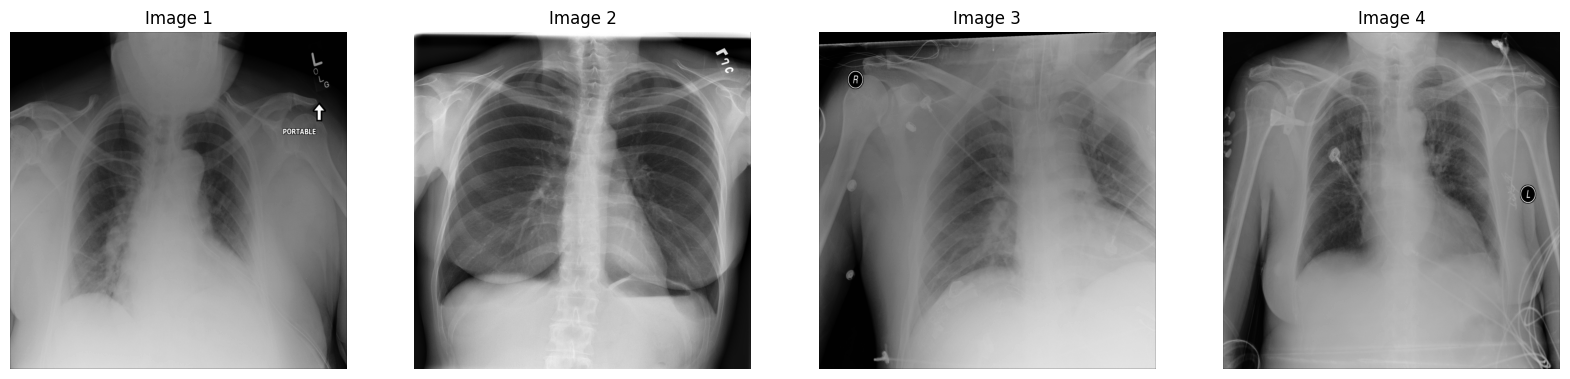

In [6]:
# Function to draw a bounding box on an image
def draw_bbox(image, bbox):
    draw = ImageDraw.Draw(image)
    draw.rectangle([(bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3])], outline="red", width=2)
    return image

# Function to plot images with bounding boxes
def plot_images_with_bboxes(images_dir, bbox_data, num_images=4):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    image_files = [img for img in os.listdir(images_dir) if img.endswith('.png')]
    for i, ax in enumerate(axes.flat):
        if i < len(image_files):
            image_file = image_files[i]
            image_path = os.path.join(images_dir, image_file)
            img = Image.open(image_path)
            bbox_entry = bbox_data[bbox_data['Image Index'] == image_file]
            if not bbox_entry.empty:
                bbox = bbox_entry.iloc[0][['Bbox [x', 'y', 'w', 'h]']].values
                img = draw_bbox(img, bbox)
            ax.imshow(img, cmap='gray')
            ax.set_title(f'Image {i+1}')
            ax.axis('off')
    plt.show()

# Path to the 'images' directory
images_dir = os.path.join(dataset_path, 'images')

# Plot images with bounding boxes
plot_images_with_bboxes(images_dir, bbox_df)

In [7]:
# Select cases with 'Pneumothorax' and controls with 'No Finding'
pneumothorax_cases = metadata_df[metadata_df['Finding Labels'].str.contains('Pneumothorax')]
no_finding_controls = metadata_df[metadata_df['Finding Labels'] == 'No Finding']

# Identify patients with both 'Pneumothorax' and 'No Finding' labels
conflicting_patients = pneumothorax_cases['Patient ID'].unique()

# Exclude conflicting patients from the control group
no_finding_controls = no_finding_controls[~no_finding_controls['Patient ID'].isin(conflicting_patients)]

In [8]:
from sklearn.model_selection import train_test_split

# Combine cases and controls into a single DataFrame
combined_df = pd.concat([pneumothorax_cases, no_finding_controls])

# Extract patient IDs
patient_ids = combined_df['Patient ID'].unique()

# Split patient IDs into training and test sets
train_patient_ids, test_patient_ids = train_test_split(patient_ids, test_size=0.15, random_state=42)

# Create training and test metadata DataFrames
train_metadata = combined_df[combined_df['Patient ID'].isin(train_patient_ids)]
test_metadata = combined_df[combined_df['Patient ID'].isin(test_patient_ids)]

In [9]:
train_metadata

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
39,00000013_001.png,Emphysema|Pneumothorax,1,13,060Y,M,AP,3056,2544,0.139,0.139,NaN
40,00000013_002.png,Emphysema|Pneumothorax,2,13,060Y,M,AP,3056,2544,0.139,0.139,NaN
42,00000013_004.png,Effusion|Emphysema|Infiltration|Pneumothorax,4,13,060Y,M,AP,3056,2544,0.139,0.139,NaN
43,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139,NaN
48,00000013_010.png,Effusion|Pneumonia|Pneumothorax,10,13,060Y,M,AP,3056,2544,0.139,0.139,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112114,00030801_000.png,No Finding,0,30801,039Y,M,PA,2500,2048,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,029Y,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,042Y,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,030Y,F,PA,2048,2500,0.168,0.168,NaN


In [10]:
test_metadata

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
1376,00000360_005.png,Atelectasis|Pneumothorax,5,360,046Y,M,PA,2500,2048,0.168000,0.168000,NaN
2107,00000547_006.png,Pneumothorax,6,547,053Y,F,PA,2886,2991,0.143000,0.143000,NaN
2187,00000574_000.png,Consolidation|Mass|Nodule|Pneumothorax,0,574,063Y,F,PA,2500,2048,0.168000,0.168000,NaN
2758,00000732_002.png,Pneumothorax,2,732,085Y,F,AP,2500,2048,0.168000,0.168000,NaN
2760,00000732_004.png,Cardiomegaly|Effusion|Fibrosis|Pleural_Thicken...,4,732,085Y,F,PA,2992,2991,0.143000,0.143000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112037,00030750_000.png,No Finding,0,30750,030Y,F,PA,2544,3056,0.139000,0.139000,NaN
112060,00030761_000.png,No Finding,0,30761,038Y,F,PA,2021,2021,0.194311,0.194311,NaN
112068,00030769_000.png,No Finding,0,30769,025Y,F,PA,1637,1788,0.194311,0.194311,NaN
112072,00030771_000.png,No Finding,0,30771,043Y,M,PA,2021,2021,0.194311,0.194311,NaN


In [ ]:
# Filter the DataFrames for Pneumothorax and No_Finding
pneumothorax_df = data[data['Finding Labels'].str.contains('Pneumothorax')]
no_finding_df = data[data['Finding Labels'] == 'No Finding']

# Equalize the Data
# Assuming you want to downsample to the smallest size
min_size = min(len(pneumothorax_df), len(no_finding_df))
pneumothorax_df = pneumothorax_df.sample(n=min_size)
no_finding_df = no_finding_df.sample(n=min_size)

# Combine the Data
combined_df = pd.concat([pneumothorax_df, no_finding_df])

# Shuffle the Data
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

